# Imports and Setup


In [ ]:
# Libraries needed 
! pip3 install torchnet -q
! pip3 install wandb -q

In [ ]:
# Imports
import numpy as np
from tqdm import tqdm
import pandas as pd
import wandb

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading from wandb
api = wandb.Api()

# Unbalanced Classes: different number of labeled and unlabed classes

# UNO

In [ ]:
# Collect runs
runs_loss = api.runs("mhaggag96/trends_project",{"tags": "UNO_C"})
run_names=['UNO_9_1','UNO_1_9','UNO_7_3','UNO_3_7','UNO_5_5']
data_df = []
for run in runs_loss:
  data_df.append(run.history())
test_dict = dict(zip(run_names, data_df)) 

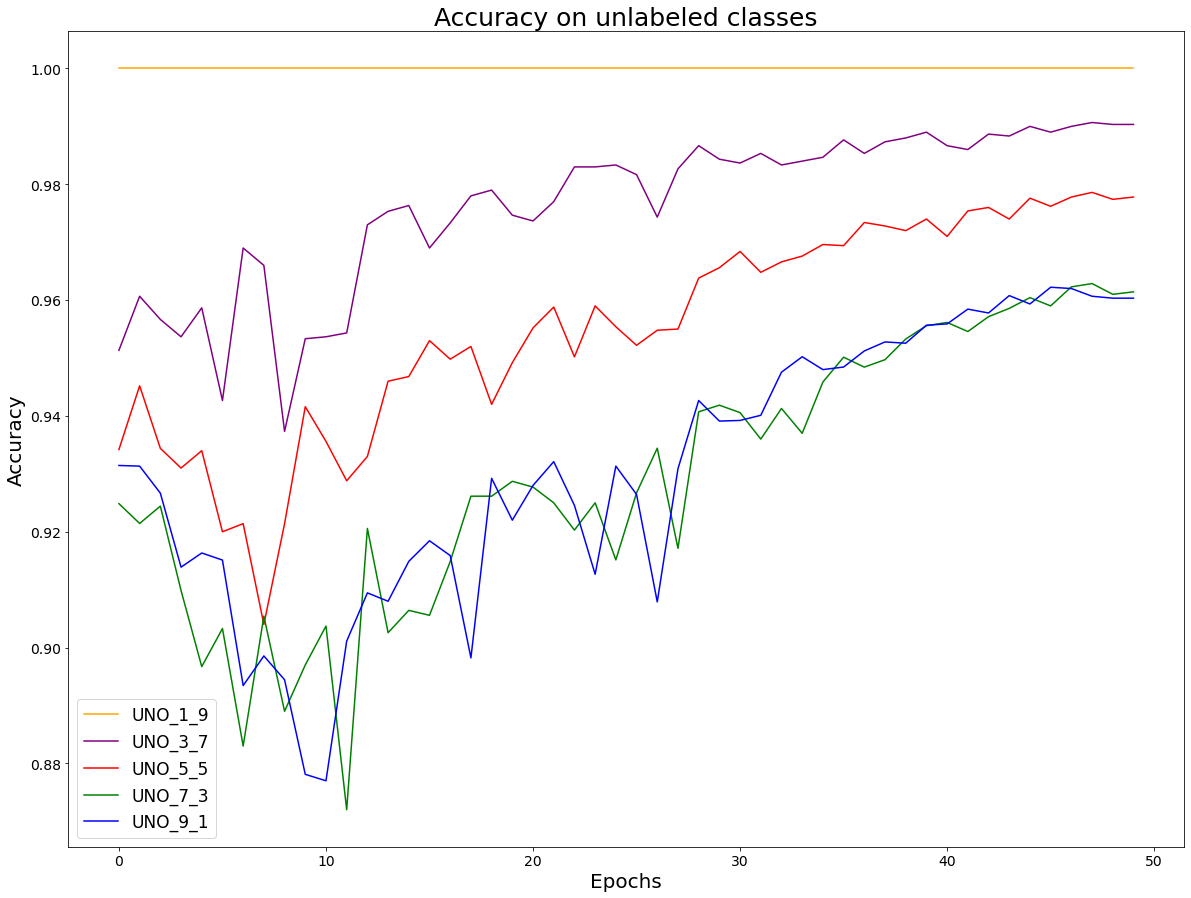

In [ ]:
# Plot Lab Test Accuracy
fig, ax= plt.subplots(figsize=(20, 15));
ax.plot(test_dict['UNO_1_9'].iloc[:,23].tolist(), color='orange',label="UNO_1_9") ;
ax.plot(test_dict['UNO_3_7'].iloc[:,23].tolist(), color='purple',label="UNO_3_7") ;
ax.plot(test_dict['UNO_5_5'].iloc[:,23].tolist(), color='red',label="UNO_5_5") ;
ax.plot(test_dict['UNO_7_3'].iloc[:,23].tolist(), color='green',label="UNO_7_3") ;
ax.plot(test_dict['UNO_9_1'].iloc[:,23].tolist(), color='blue',label="UNO_9_1") ;
ax.set_xlabel('Epochs',fontsize=20);
ax.set_ylabel('Accuracy',fontsize=20);
ax.set_title('Accuracy on unlabeled classes',fontsize=25);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', framealpha=0.8,fontsize=17)
plt.show()

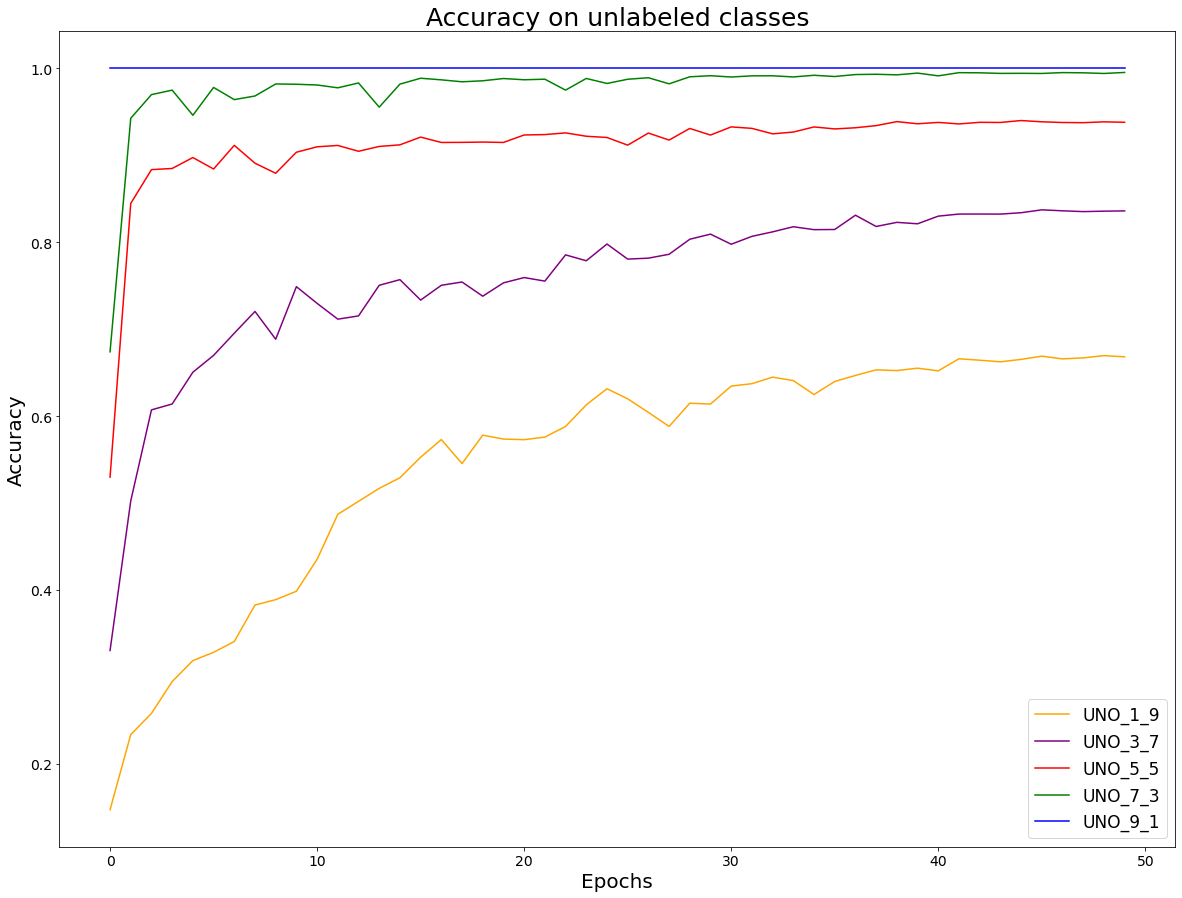

In [ ]:
# Plot Unlab Test Accuracy
fig, ax= plt.subplots(figsize=(20, 15));
ax.plot(test_dict['UNO_1_9'].iloc[:,13].tolist(), color='orange',label="UNO_1_9") ;
ax.plot(test_dict['UNO_3_7'].iloc[:,13].tolist(), color='purple',label="UNO_3_7") ;
ax.plot(test_dict['UNO_5_5'].iloc[:,13].tolist(), color='red',label="UNO_5_5") ;
ax.plot(test_dict['UNO_7_3'].iloc[:,13].tolist(), color='green',label="UNO_7_3") ;
ax.plot(test_dict['UNO_9_1'].iloc[:,13].tolist(), color='blue',label="UNO_9_1") ;
ax.set_xlabel('Epochs',fontsize=20);
ax.set_ylabel('Accuracy',fontsize=20);
ax.set_title('Accuracy on unlabeled classes',fontsize=25);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', framealpha=0.8,fontsize=17)
plt.show()

In [ ]:
run_names.sort()
unlab_acc = [test_dict[run].iloc[49,13] for run in run_names]
lab_acc = [test_dict[run].iloc[49,23] for run in run_names]

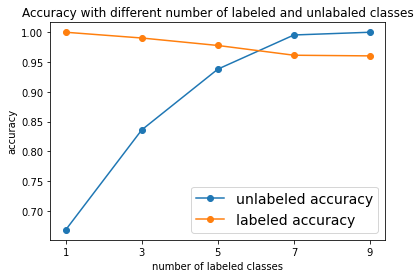

In [ ]:
# Plot Final Accuracy
x = [1,3,5,7,9]

plt.plot(x, unlab_acc, label = "unlabeled accuracy", marker='o')
plt.plot(x, lab_acc, label = "labeled accuracy", marker='o')

x_labels = ['1', '3', '5', '7', '9']
plt.xticks(ticks=x, labels=x_labels)
plt.xlabel('number of labeled classes')
plt.ylabel('accuracy')
  

plt.title('Accuracy with different number of labeled and unlabaled classes')
plt.legend(loc='best', framealpha=0.8,fontsize=14)
plt.show()